In [1]:
# 库文件
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 设置中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)  # 替换为你的中文字体文件路径
from sklearn.preprocessing import StandardScaler


In [2]:
# 读取Excel文件
excel_path = '数据-时间戳.xlsx'
df_sheet = pd.read_excel(excel_path, sheet_name='Sheet4') 
df_sheet.columns


Index(['SI插补', '铁口1温度插补', '主参数时间戳', '富氧率', '透气性指数', 'CO', 'H2', 'CO2', '标准风速',
       '富氧流量', '冷风流量', '鼓风动能', '炉腹煤气量', '炉腹煤气指数', '理论燃烧温度', '顶压', '富氧压力',
       '冷风压力', '全压差', '热风压力', '实际风速', '热风温度', '顶温东北', '顶温西南', '顶温西北', '顶温东南',
       '阻力系数', '鼓风湿度', '设定喷煤量', '上小时喷煤量'],
      dtype='object')

In [10]:
# 计算每个参数与高炉温度的相关性
correlations = df_sheet.corr()['热风温度'].abs().sort_values(ascending=False)

# 选择最相关的前几个参数
top_features = correlations.index.tolist()
# 打印最相关的参数
print("Top features:", top_features)
# 查看具体相关性数值
print("Correlation values:")
print(correlations.head(24))


Top features: ['热风温度', '实际风速', '上小时喷煤量', '设定喷煤量', '理论燃烧温度', 'CO2', '富氧率', '富氧流量', '鼓风动能', '顶温西北', '顶温东南', '顶温东北', '顶温西南', '透气性指数', '冷风压力', 'SI插补', '热风压力', '炉腹煤气量', '炉腹煤气指数', '鼓风湿度', '顶压', '标准风速', '冷风流量', '主参数时间戳', '全压差', 'H2', 'CO', '富氧压力', '铁口1温度插补', '阻力系数']
Correlation values:
热风温度      1.000000
实际风速      0.937547
上小时喷煤量    0.903158
设定喷煤量     0.901029
理论燃烧温度    0.893648
CO2       0.893573
富氧率       0.888062
富氧流量      0.878919
鼓风动能      0.844087
顶温西北      0.801234
顶温东南      0.795087
顶温东北      0.781582
顶温西南      0.745990
透气性指数     0.695480
冷风压力      0.641615
SI插补      0.629918
热风压力      0.590451
炉腹煤气量     0.552842
炉腹煤气指数    0.552825
鼓风湿度      0.527328
顶压        0.502411
标准风速      0.481639
冷风流量      0.481272
主参数时间戳    0.433167
Name: 热风温度, dtype: float64


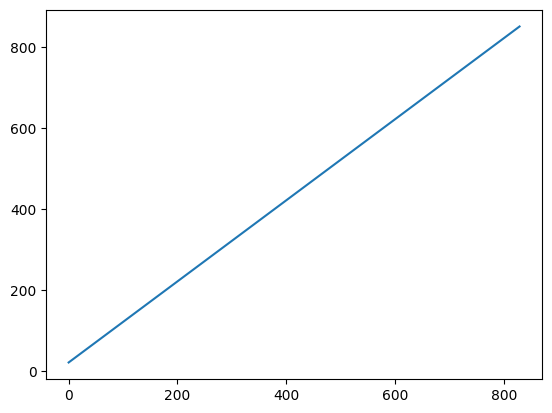

In [4]:
plt.plot(df_sheet['主参数时间戳'])
